In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("heart_disease_uci.csv")

display(df.head())
display(df.info())
display(df.columns)
display(df.describe())
display(df.shape)
display(df.isnull().sum())

# Veri hakkındaki gerekli bilgileri edinmek için bu komutlar kullanılmıştır, gerekli bilgiler aşağıdadır.

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


None

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


(920, 16)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import pandas as pd

original_columns = df.columns.tolist()

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

transformer = ColumnTransformer(
    transformers=[("numeric", SimpleImputer(strategy="median"), numeric_cols),("categorical", SimpleImputer(strategy="most_frequent"), categorical_cols)])

transformed_data = transformer.fit_transform(df)
imputed_df = pd.DataFrame(transformed_data,columns=numeric_cols + categorical_cols)

for col in numeric_cols + categorical_cols:
    imputed_df[col] = imputed_df[col].astype(df[col].dtypes)

df = imputed_df.reindex(columns=original_columns) 

print(df.info())

# SimpleImputer kullanarak eksik değerler doldurulmuştur, doldurma sonrasında yeniden orijinal (int,float) değerlerine çevirilmiştir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


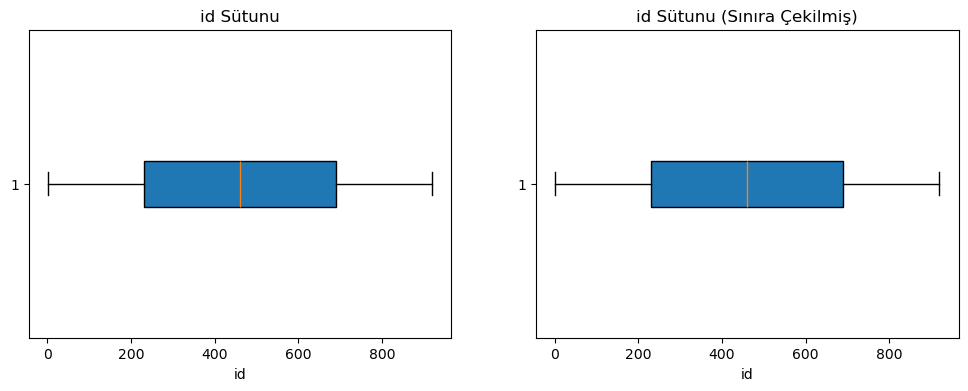

id Sütunun Q1 değeri: 230.75
id Sütunun Q3 değeri: 690.25
id Sütunun IQR değeri: 459.5
id Sütunun Aykırı değer sayısı: 0


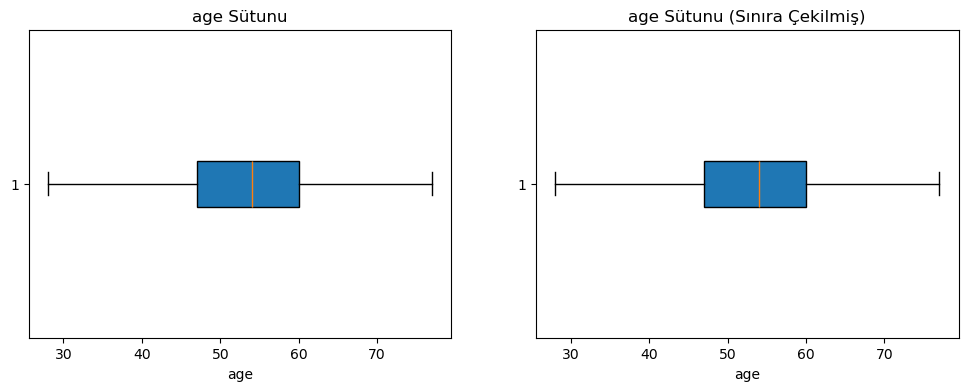

age Sütunun Q1 değeri: 47.0
age Sütunun Q3 değeri: 60.0
age Sütunun IQR değeri: 13.0
age Sütunun Aykırı değer sayısı: 0


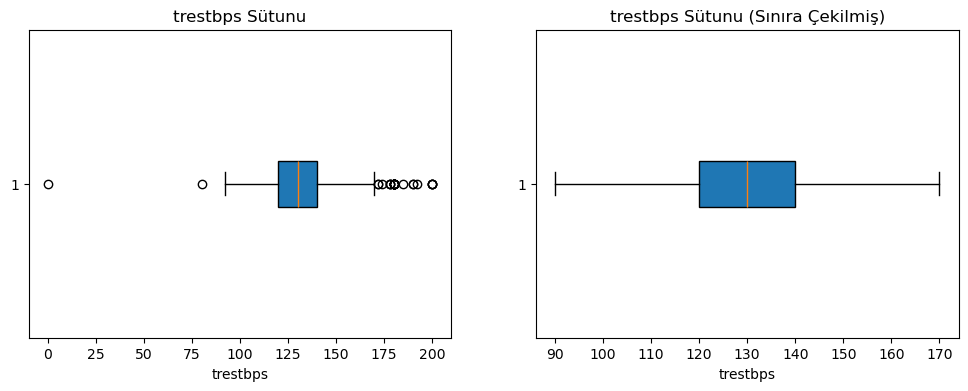

trestbps Sütunun Q1 değeri: 120.0
trestbps Sütunun Q3 değeri: 140.0
trestbps Sütunun IQR değeri: 20.0
trestbps Sütunun Aykırı değer sayısı: 28


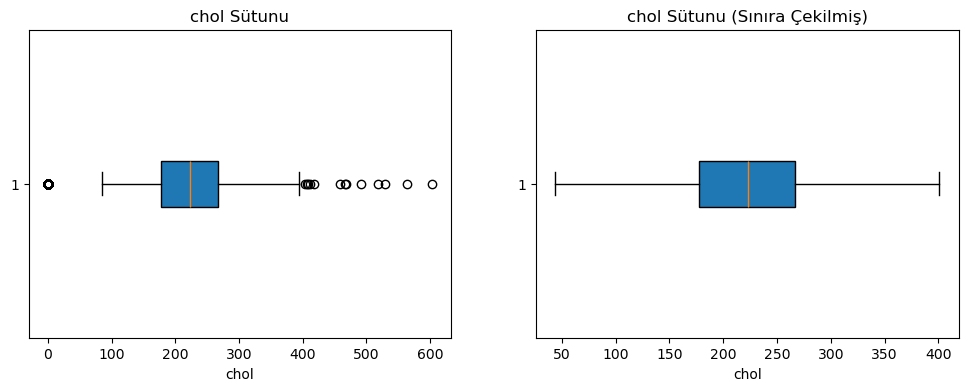

chol Sütunun Q1 değeri: 177.75
chol Sütunun Q3 değeri: 267.0
chol Sütunun IQR değeri: 89.25
chol Sütunun Aykırı değer sayısı: 185


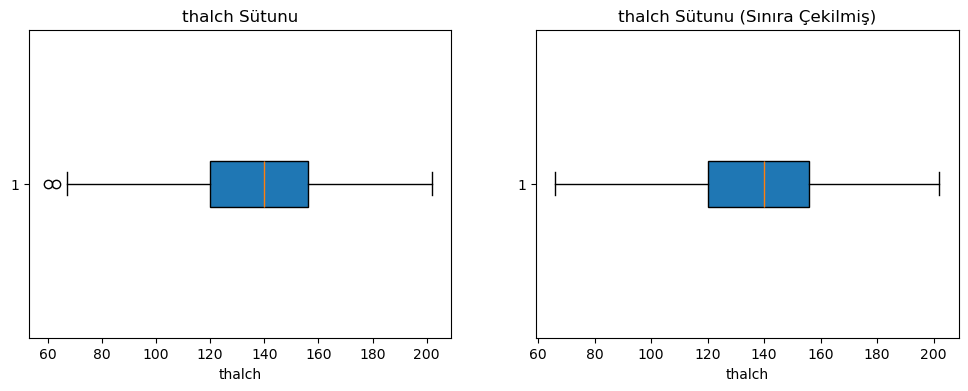

thalch Sütunun Q1 değeri: 120.0
thalch Sütunun Q3 değeri: 156.0
thalch Sütunun IQR değeri: 36.0
thalch Sütunun Aykırı değer sayısı: 2


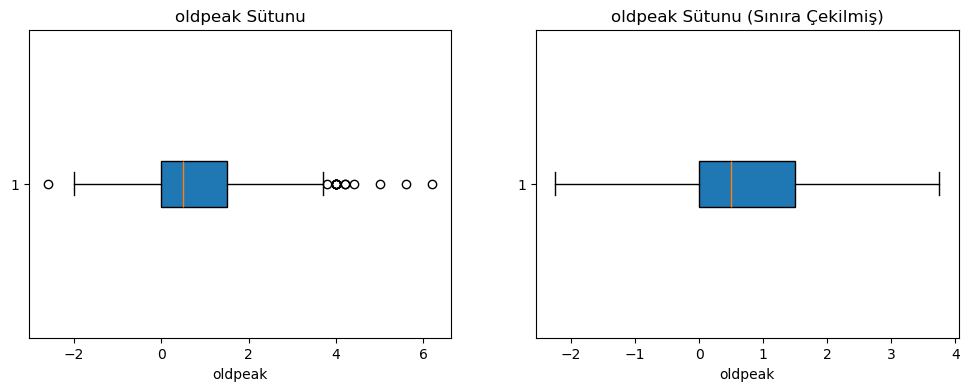

oldpeak Sütunun Q1 değeri: 0.0
oldpeak Sütunun Q3 değeri: 1.5
oldpeak Sütunun IQR değeri: 1.5
oldpeak Sütunun Aykırı değer sayısı: 16


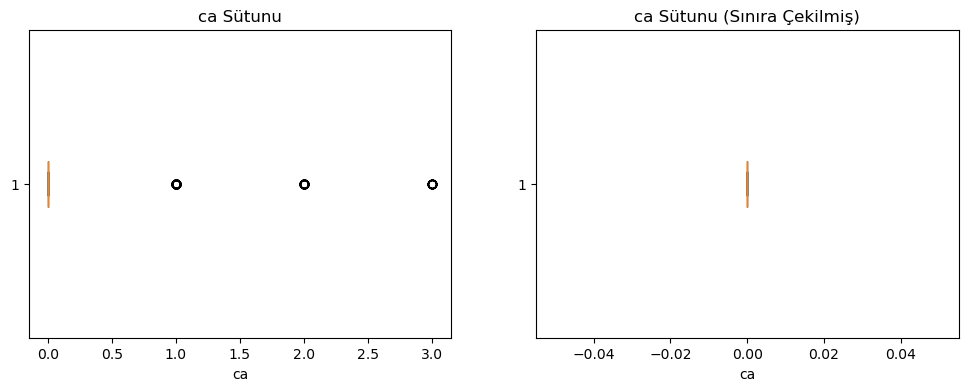

ca Sütunun Q1 değeri: 0.0
ca Sütunun Q3 değeri: 0.0
ca Sütunun IQR değeri: 0.0
ca Sütunun Aykırı değer sayısı: 128


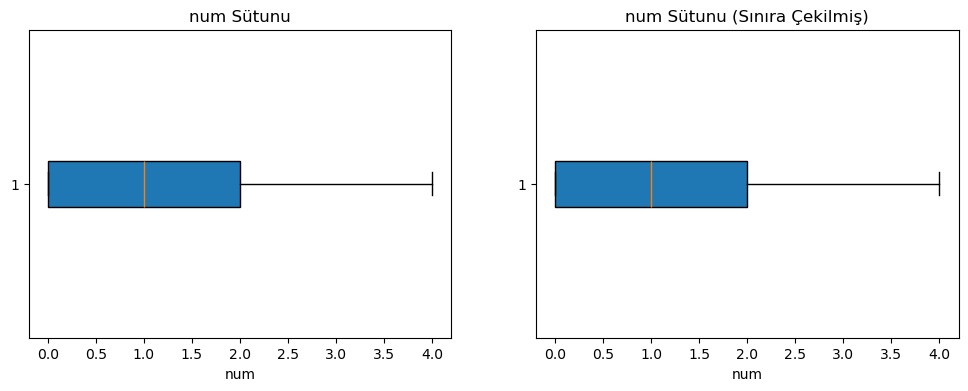

num Sütunun Q1 değeri: 0.0
num Sütunun Q3 değeri: 2.0
num Sütunun IQR değeri: 2.0
num Sütunun Aykırı değer sayısı: 0


In [ ]:
for i in range(len(numeric_cols)):
    col_name = numeric_cols[i] 
    Q1 = np.percentile(df[col_name], 25) 
    Q3 = np.percentile(df[col_name], 75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - (1.5 * IQR)
    ust_sinir = Q3 + (1.5 * IQR)
    aykiri_degerler = df[(df[col_name] < alt_sinir) | (df[col_name] > ust_sinir)][col_name]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 satır, 2 sütun

    ax1.boxplot(df[col_name], vert=False, patch_artist=True)
    ax1.set_title(f"{numeric_cols[i]} Sütunu")
    ax1.set_xlabel(col_name)

    df[col_name] = df[col_name].apply(lambda x: alt_sinir if x < alt_sinir else ust_sinir if x > ust_sinir else x)
    ax2.boxplot(df[col_name].dropna(), vert=False, patch_artist=True)
    ax2.set_title(f"{numeric_cols[i]} Sütunu (Sınıra Çekilmiş)")
    ax2.set_xlabel(col_name)
    plt.show()


    print(f"{numeric_cols[i]} Sütunun Q1 değeri: {Q1}")
    print(f"{numeric_cols[i]} Sütunun Q3 değeri: {Q3}")
    print(f"{numeric_cols[i]} Sütunun IQR değeri: {IQR}")
    print(f"{numeric_cols[i]} Sütunun Aykırı değer sayısı: {len(aykiri_degerler)}")


# Bu kod bloğunda 1. çeyrek, 3. çeyrek ve IQR değerleri hesaplanmış ve yazdırılmış, aykırı değerler tespit edilmiş, önce grafiğin normal hâli, sonrasında aykırı değerlerin sınırlandırılmış hâli grafiğe çizilmiştir.